In [ ]:
# since I will be using sklearn 1.3.2 while making web app using flask
!pip install scikit-learn==1.3.2

In [2]:
#importing the necessary packages
import numpy as np
import pandas as pd

In [3]:
#Reading the dataset using panda
df=pd.read_csv(r'/content/Original_Dataset.csv')

In [ ]:
df.head()

In [5]:
# Total number of unique diseases in the dataset
pd.unique(df['Disease'])

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
# Seeing the datatype of all the columns and some other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
# making the list of every symptoms in a single column i.e. Symptoms
df["Symptoms"] = 0

for i in range(len(df)):
    value = df.iloc[i].values.tolist()

    if 0 in value:
        df["Symptoms"][i] = value[1:value.index(0)]

    else:
        df["Symptoms"][i] = value[1:]


<ipython-input-7-8edbe67be18a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Symptoms"][i] = value[1:value.index(0)]


In [8]:
df['Symptoms'][0]

['itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [9]:
column=df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()



In [10]:
column

array(['itching', ' skin_rash', ' nodal_skin_eruptions', ..., nan, nan,
       nan], dtype=object)

In [11]:
# making the lists of all the symptoms
symps = pd.unique(column).tolist()
symps = [i for i in symps if str(i) != "nan"]


In [12]:
len(symps)

131

In [13]:
# Encoding the symptoms
new_data = symptoms = pd.DataFrame(columns = symps ,index = df.index)
symptoms["Symptoms"] = df["Symptoms"]
for i in symps:
    symptoms[i] = symptoms.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)
symptoms["Disease"] = df["Disease"]
symptoms = symptoms.drop("Symptoms",axis=1)
symptoms.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [14]:
symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to Disease
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
len(np.unique(symptoms.Disease))

41

In [17]:
# Encoding the diseases
symptoms.Disease.replace(to_replace=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'],value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,
        17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41],inplace=True)

In [ ]:
symptoms

In [19]:
# Extracting the independent data i.e. symptoms
x=symptoms.drop(['Disease'],axis=1)

In [20]:
# Extracting the dependent data i.e. diseases
y=symptoms.Disease

In [21]:
# Dividing the x and y into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [22]:
y_test.dtype

dtype('int64')

In [25]:
# from sklearn.linear_model import LogisticRegression

In [26]:
# model=LogisticRegression()

In [27]:
# model.fit(x_train,y_train)

LogisticRegression()

In [28]:
# model.score(x_test,y_test)

1.0

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)

In [25]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
knn_classifier.score(x_test,y_test)

1.0

In [27]:
import matplotlib.pyplot as plt

In [28]:
y_pred=knn_classifier.predict(x_test)

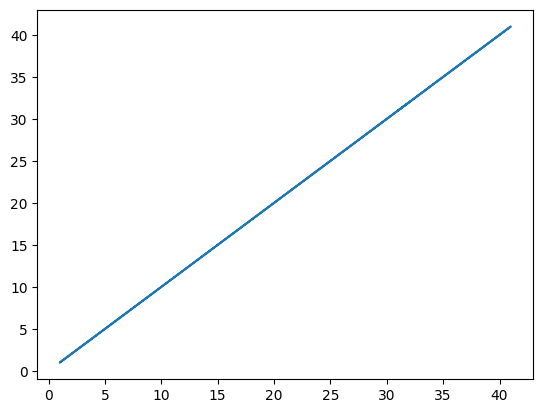

In [29]:
plt.plot(y_test,y_pred)

In [30]:
# Pickling the knn model for deployment
import pickle

In [31]:
pickle.dump(knn_classifier,open('Diseases_classify.pkl','wb'))
pickled_model=pickle.load(open('Diseases_classify.pkl','rb'))

In [32]:
pred=x.loc[3]

In [35]:
pred=pd.DataFrame(pred)
pred

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
pickled_model.predict(pred)[0]

1